In [1]:
from langchain_mistralai import ChatMistralAI
from langgraph.graph import StateGraph,START,END
from typing import TypedDict
from dotenv import load_dotenv
import os
load_dotenv()

True

In [2]:
#define state
class BLOG(TypedDict):
    outline:str
    title:str
    content:str

In [3]:
model=ChatMistralAI(api_key=os.getenv("mistral_ai"))

In [4]:
#define the graph
graph=StateGraph(BLOG)

In [5]:
def get_outline(state:BLOG)->BLOG['outline']:
    prompt=f"generate a comprehensive and clear outline for a blog post about {state['title']}"
    outline=model.invoke(prompt).content
    state['outline']=outline
    return {'outline':outline}

def get_content(state:BLOG)->BLOG['content']:
    prompt=f"generate a comprehensive and clear content for a blog post about {state['title']} based on the outline {state['outline']}"
    content=model.invoke(prompt).content
    state['content']=content
    return {'content':content}

In [6]:
#define the nodes
graph.add_node('outline',get_outline)
graph.add_node('content',get_content)

#make the edges
graph.add_edge(START,'outline')
graph.add_edge('outline','content')
graph.add_edge('content',END)

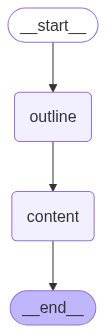

In [7]:
workflow=graph.compile()

workflow

In [10]:
result=workflow.invoke({'title':'can a person with non tech backgorund go into ai field like bcom hons'})
result['content']

"Artificial Intelligence (AI) is a rapidly growing field, with applications in various industries such as healthcare, finance, and entertainment. As AI continues to advance and shape our world, many individuals are considering a career change or entering the workforce in this exciting field. But what about those who come from a non-technical background, such as a BCom Hons degree? Is it possible for them to go into the AI field? In this blog post, we will explore this question and provide a comprehensive guide for non-technical background individuals who are interested in transitioning into AI.\n\nI. Introduction\n\nA. Explanation of the growing field of Artificial Intelligence (AI)\nArtificial Intelligence (AI) is a branch of computer science that aims to create machines that mimic human intelligence. With the rapid advancement of technology, AI has become a significant part of our daily lives, from virtual assistants like Siri and Alexa to recommendation algorithms used by Netflix an